<a href="https://colab.research.google.com/github/VISHAL2077/lab_assignments/blob/main/Assignment_7_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


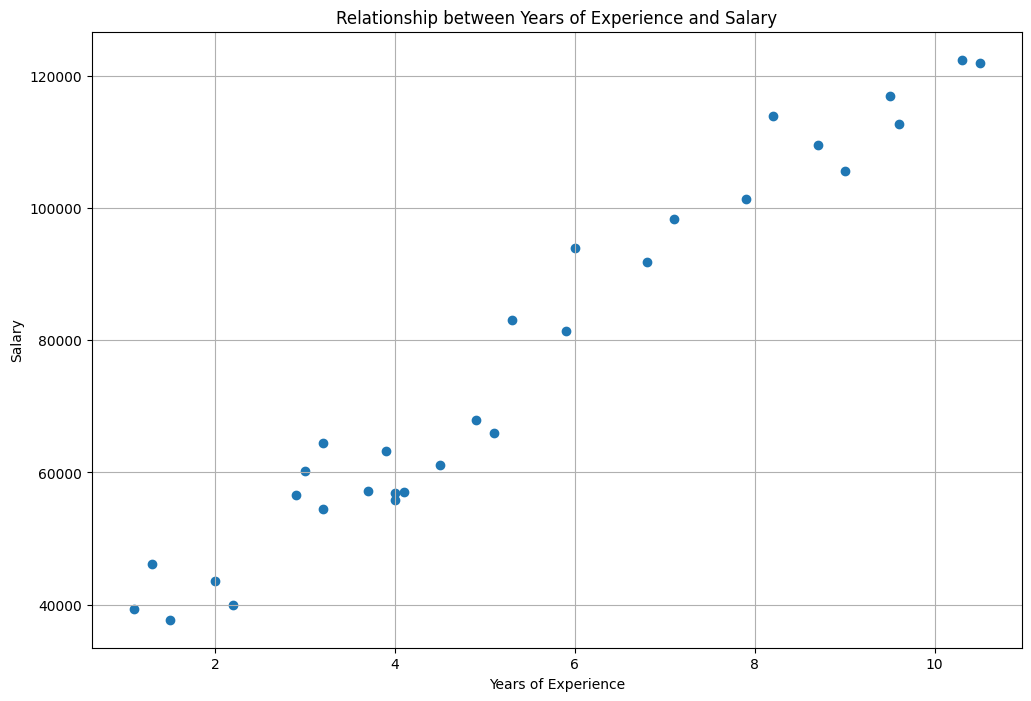

Best fitting degree: 6


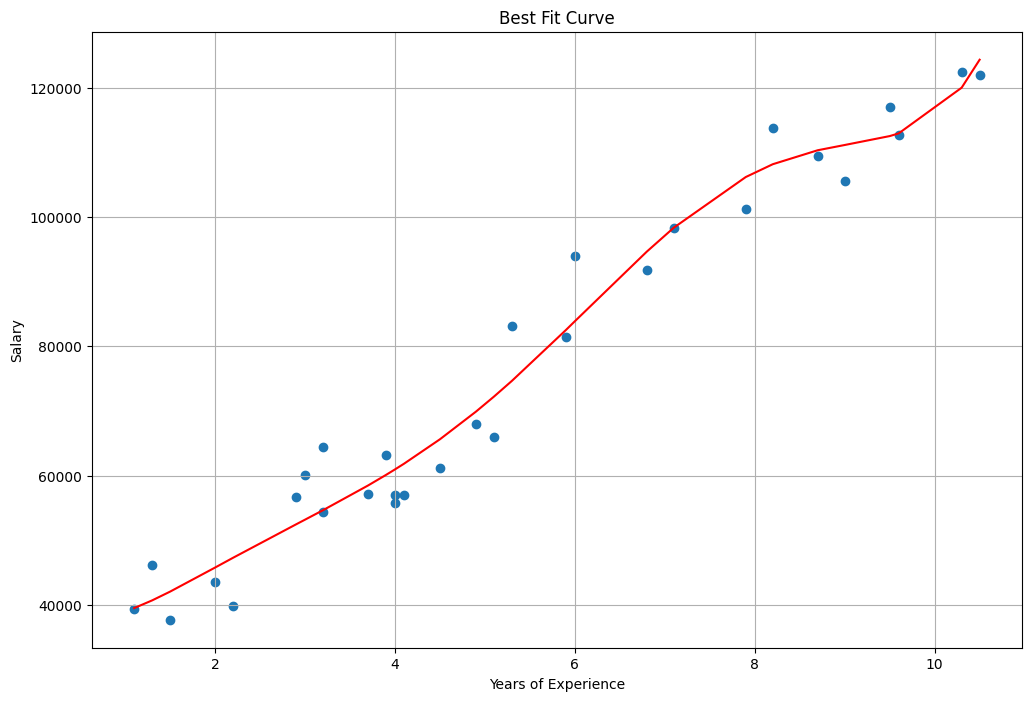

MSE for test size 20: 2749928783.984157
MAE for test size 20: 23297.481932357558
MSE for test size 25: 1653659027004792.0
MAE for test size 25: 18110830.24730255


In [23]:
#Question 1, Assignment 7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('/content/sample_data/Salary_Data.csv')
print(df.head())

X = df[["YearsExperience"]]
y = df["Salary"]

plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Relationship between Years of Experience and Salary")
plt.grid(True)
plt.show()

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mse_values = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_degree = degrees[mse_values.index(min(mse_values))]
print(f"Best fitting degree: {best_degree}")

poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Best Fit Curve")
plt.grid(True)
plt.show()

X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=20/len(y), random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_20 = mean_squared_error(y_test, y_pred)
mae_20 = mean_absolute_error(y_test, y_pred)
print(f"MSE for test size 20: {mse_20}")
print(f"MAE for test size 20: {mae_20}")

X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=25/len(y), random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_25 = mean_squared_error(y_test, y_pred)
mae_25 = mean_absolute_error(y_test, y_pred)
print(f"MSE for test size 25: {mse_25}")
print(f"MAE for test size 25: {mae_25}")

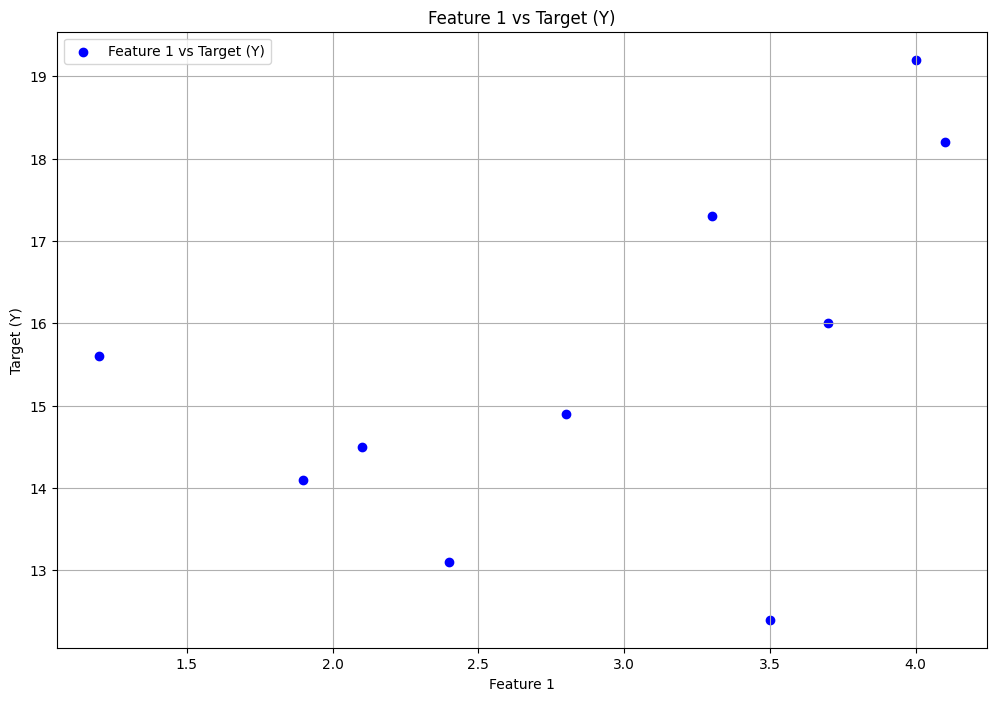

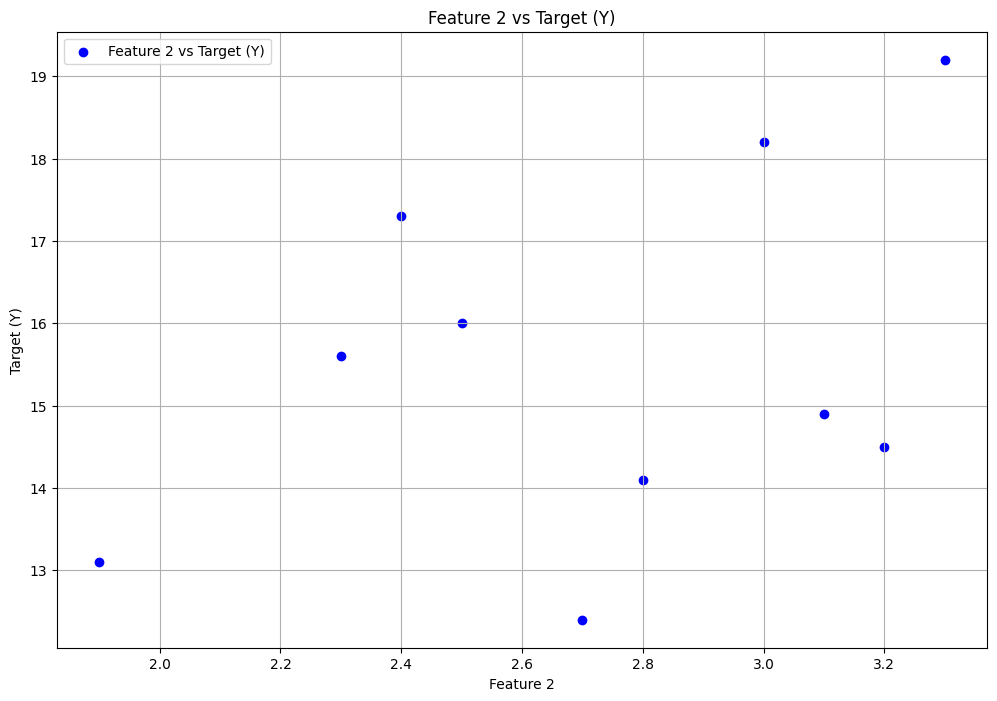

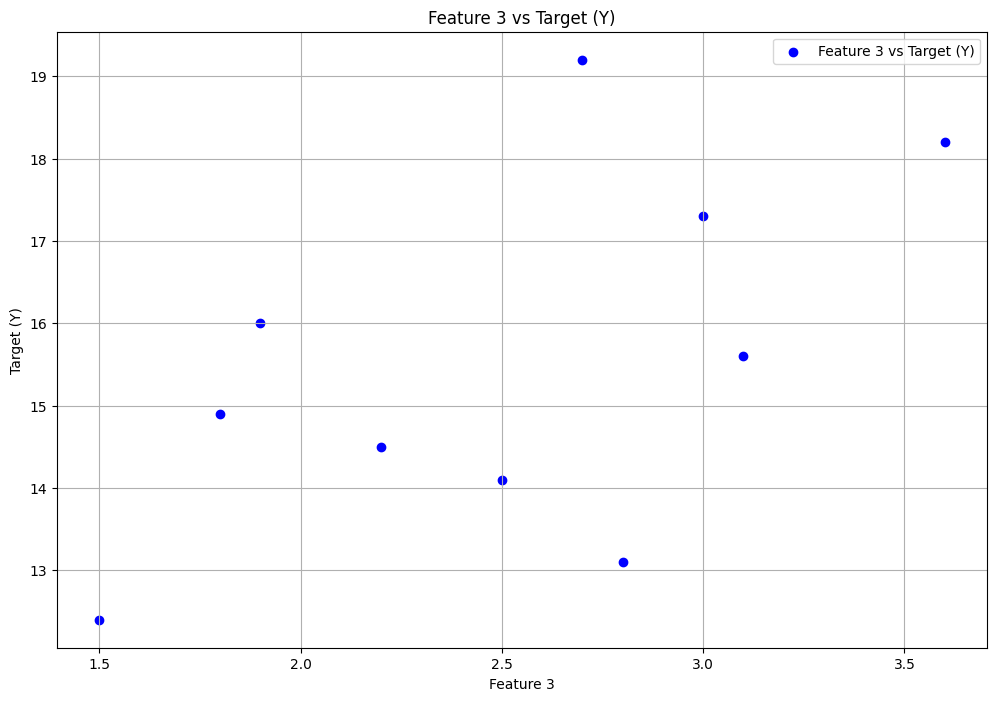

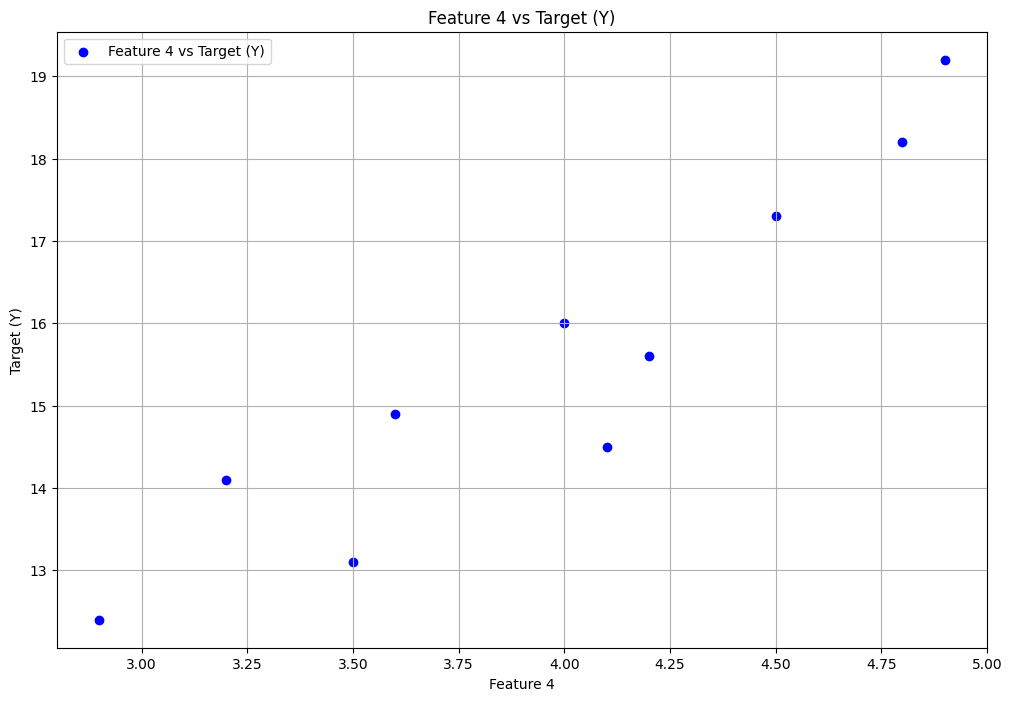

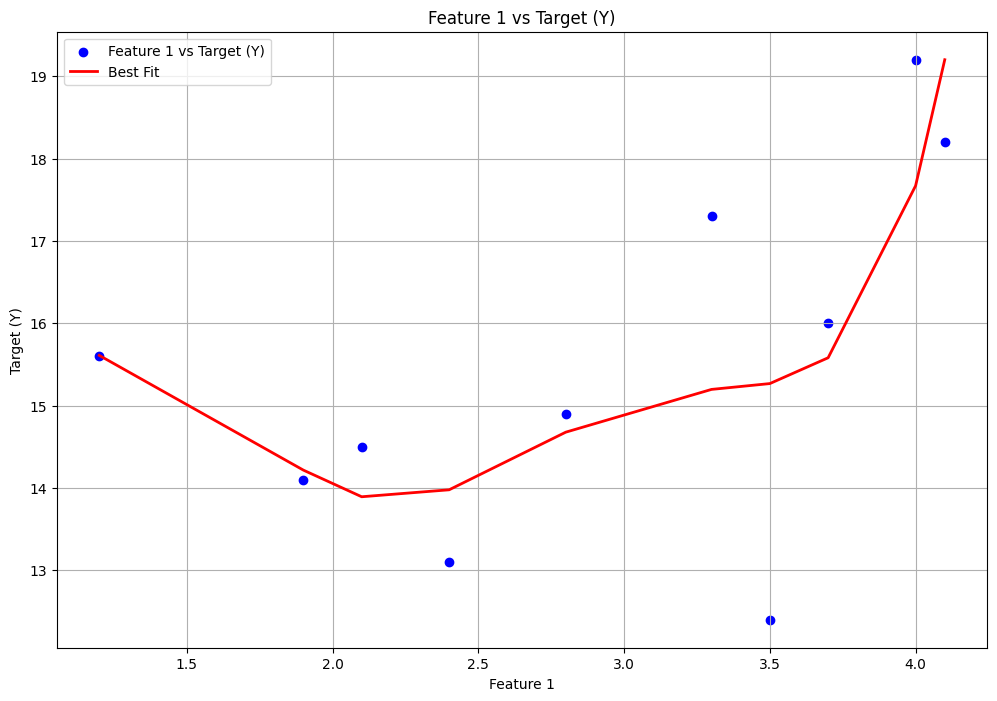

Best degree for feature 1: 5, MSE: 1.74


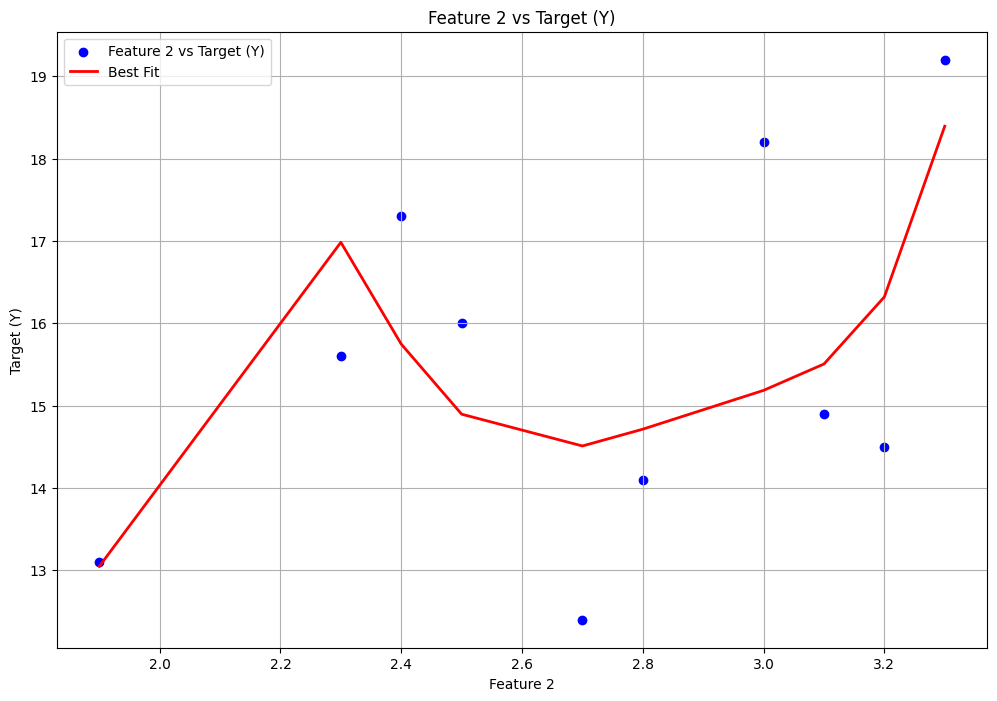

Best degree for feature 2: 5, MSE: 2.38


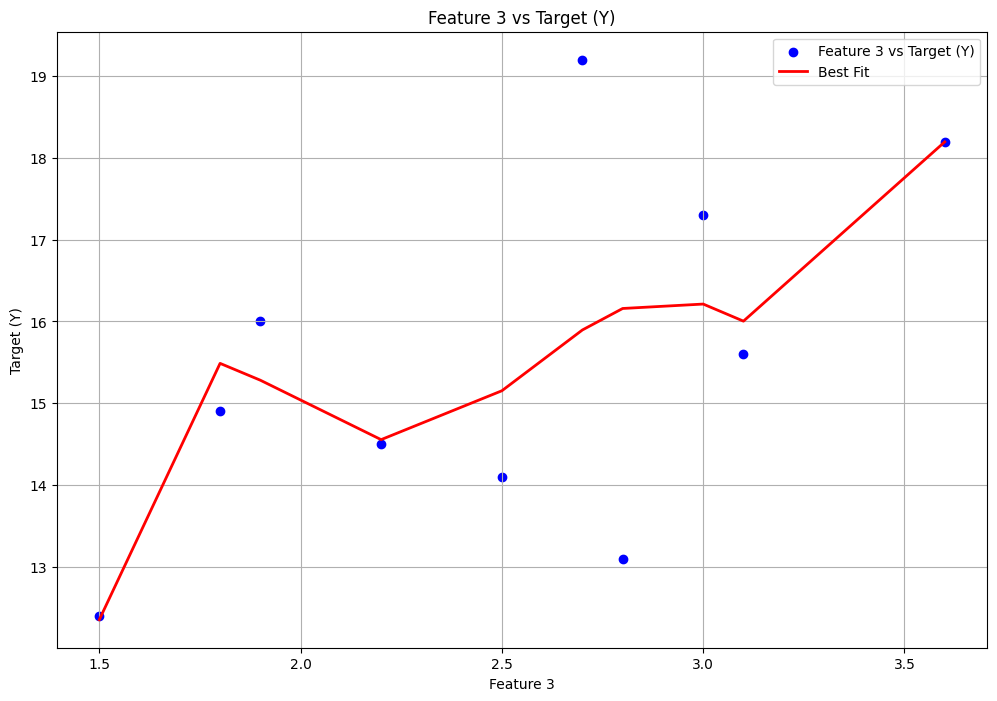

Best degree for feature 3: 5, MSE: 2.36


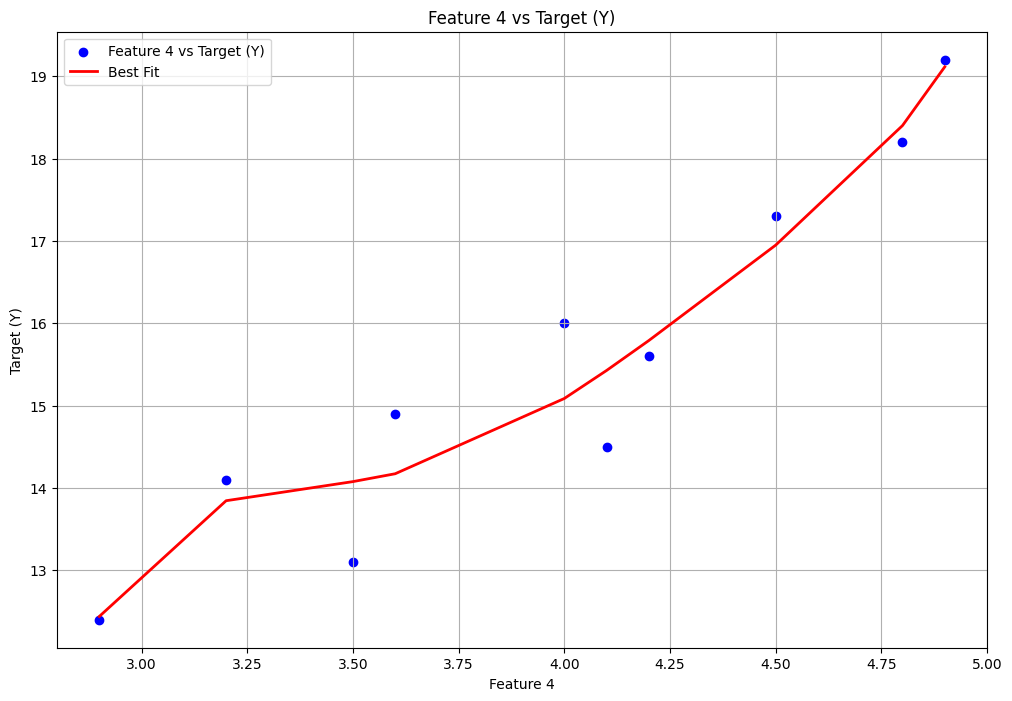

Best degree for feature 4: 5, MSE: 0.35
MSE (Linear, Test Size 20): 1.20, MAE (Linear, Test Size 20): 1.03
MSE (Linear, Test Size 30): 0.83, MAE (Linear, Test Size 30): 0.87


In [22]:
#Question 2, Assignment 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/sample_data/Assignment7_Ques2 - Sheet1.csv')

X = data.iloc[:, :-1]
y = data['Target (Y)']

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=42)

# Plotting without best fit
for i in range(4):
    plt.figure(figsize=(12, 8))
    plt.scatter(X.iloc[:, i], y, color='blue', label=f'Feature {i+1} vs Target (Y)')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target (Y)')
    plt.title(f'Feature {i+1} vs Target (Y)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculating best degree and plotting with best fit
for i in range(4):
    plt.figure(figsize=(12, 8))
    plt.scatter(X.iloc[:, i], y, color='blue', label=f'Feature {i+1} vs Target (Y)')

    X_feature = X.iloc[:, i].values.reshape(-1, 1)
    best_degree = 0
    best_mse = float('inf')
    best_model = None

    for degree in range(1, 6):  # iterate over degrees from 1 to 5
        poly_features = PolynomialFeatures(degree=degree)
        X_feature_poly = poly_features.fit_transform(X_feature)

        model_poly = LinearRegression()
        model_poly.fit(X_feature_poly, y)

        y_feature_pred = model_poly.predict(X_feature_poly)
        mse = mean_squared_error(y, y_feature_pred)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree
            best_model = model_poly

    X_feature_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_feature)
    y_feature_pred = best_model.predict(X_feature_poly)

    sort_idx = np.argsort(X_feature[:, 0])
    plt.plot(X_feature[sort_idx], y_feature_pred[sort_idx], color='red', label='Best Fit', linewidth=2)

    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target (Y)')
    plt.title(f'Feature {i+1} vs Target (Y)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best degree for feature {i+1}: {best_degree}, MSE: {best_mse:.2f}")

# Linear Regression Modeling
model = LinearRegression()
model.fit(X_train_20, y_train_20)
y_pred_linear_20 = model.predict(X_test_20)

mse_20 = mean_squared_error(y_test_20, y_pred_linear_20)
mae_20 = mean_absolute_error(y_test_20, y_pred_linear_20)

model.fit(X_train_30, y_train_30)
y_pred_linear_30 = model.predict(X_test_30)

mse_30 = mean_squared_error(y_test_30, y_pred_linear_30)
mae_30 = mean_absolute_error(y_test_30, y_pred_linear_30)

print(f"MSE (Linear, Test Size 20): {mse_20:.2f}, MAE (Linear, Test Size 20): {mae_20:.2f}")
print(f"MSE (Linear, Test Size 30): {mse_30:.2f}, MAE (Linear, Test Size 30): {mae_30:.2f}")